# <span style='font-family:"Times New Roman"'> <span styel=''> Binary Morphology

## <span style='font-family:"Times New Roman"'> <span styel=''> Loading Required Modules:

In [1]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
from heapq import nsmallest
import skimage.morphology
import tifffile as tif
from PIL import Image
import numpy as np
import imageio
import scipy
import pylab
import math
import glob
import time
import sys
import os
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = "Times New Roman"  #Setting Global Font to Times New Roman

In [3]:
abspath = os.path.abspath('') 
os.chdir(abspath)

# <span style='font-family:"Times New Roman"'> <span styel=''>(a) Introductory Morphology I.

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this part, basic erosion, dilation, opening, and closing commands used in morphologically process of images will be introduced. In section (a), `fingerprint-noisy.png` image from [1] is used. 
<span style='font-family:"Times New Roman"'>[1] Gonzalez, Rafael C., Richard Eugene Woods, and Steven L. Eddins. Digital image processing using MATLAB. Pearson Education India, 2004.

## <span style='font-family:"Times New Roman"'> <span styel=''>(a-i) Visualizing Structuring Elements:

In [4]:
A = Image.open('fingerprint-noisy.png').convert("L")

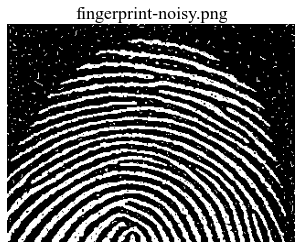

In [5]:
plt.title('fingerprint-noisy.png', fontsize = 18)
plt.imshow(np.asarray(A), cmap = 'gray')
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> Defining the structuring element:

In [6]:
B_test = skimage.morphology.disk(11)

In [7]:
whos

Variable    Type        Data/Info
---------------------------------
A           Image       <PIL.Image.Image image mo<...>315x238 at 0x1F1AFF87CC8>
B_test      ndarray     23x23: 529 elems, type `uint8`, 529 bytes
Image       module      <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
abspath     str         D:\Sina's PhD Studies\Cla<...>essing\Projects\Project 2
distance    module      <module 'scipy.spatial.di<...>y\\spatial\\distance.py'>
glob        module      <module 'glob' from 'C:\\<...>Anaconda3\\lib\\glob.py'>
imageio     module      <module 'imageio' from 'C<...>s\\imageio\\__init__.py'>
math        module      <module 'math' (built-in)>
np          module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
nsmallest   function    <function nsmallest at 0x000001F1A87791F8>
os          module      <module 'os' from 'C:\\Us<...>\\Anaconda3\\lib\\os.py'>
plt         module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
pylab       module      <mod

#### <span style='font-family:"Times New Roman"'> `B_test` Is a 23 by 23 ndarray that has `uint8` type.

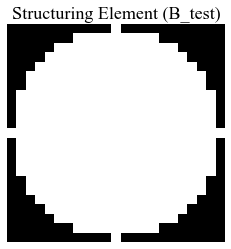

In [8]:
plt.title('Structuring Element (B_test)', fontsize = 18)
plt.imshow(B_test,cmap='gray')
plt.axis('off')
plt.show()

#### <span style='font-family:"Times New Roman"'> Structuring element `B_test` has a disk-like structure which was expected.

## <span style='font-family:"Times New Roman"'> <span styel=''>(a-ii) Erosion:

In [9]:
B = skimage.morphology.selem.square(3)

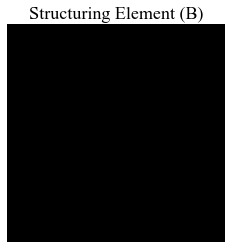

In [10]:
plt.title('Structuring Element (B)', fontsize = 18)
plt.imshow(B,cmap='gray')
plt.axis('off')
plt.show()

In [11]:
Ac = skimage.morphology.binary_erosion(np.array(A),B)

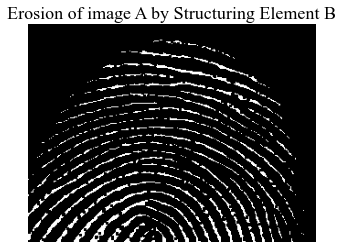

In [12]:
plt.title('Erosion of image A by Structuring Element B', fontsize = 18)
plt.imshow(Ac,cmap='gray')
plt.axis('off')
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''>(a-iii) Dilation and Opening:

In [13]:
Ad1 = skimage.morphology.binary_dilation(Ac,B)

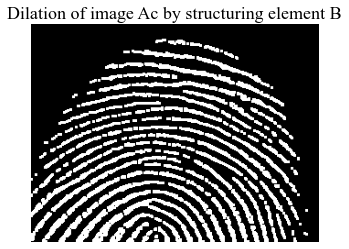

In [14]:
plt.title('Dilation of image Ac by structuring element B', fontsize = 18)
plt.imshow(Ad1,cmap='gray')
plt.axis('off')
plt.show()

In [15]:
Ad2 = skimage.morphology.binary_opening(np.array(A),B)

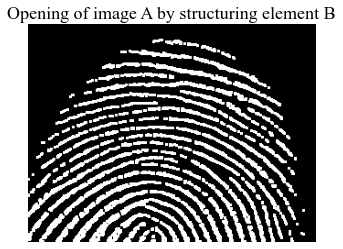

In [16]:
plt.title('Opening of image A by structuring element B', fontsize = 18)
plt.imshow(Ad1,cmap='gray')
plt.axis('off')
plt.show()

In [17]:
print('Maximum absolute difference of Ad2 and Ad1 is :')
print(np.max(Ad2.astype(int) - Ad1.astype(int)))

Maximum absolute difference of Ad2 and Ad1 is :
0


#### <span style='font-family:"Times New Roman"'>This satisfies the fact that dilation of an erosion is equivalent to an opening!

## <span style='font-family:"Times New Roman"'> <span styel=''>(a-iv) Dilation:

In [18]:
Ae = skimage.morphology.binary_dilation(Ad1,B)

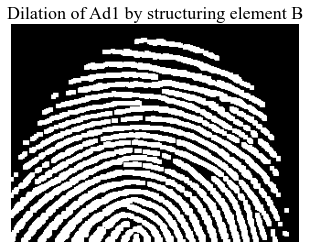

In [19]:
plt.title('Dilation of Ad1 by structuring element B', fontsize = 18)
plt.imshow(Ae,cmap='gray')
plt.axis('off')
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''> (a-v) Erosion and Closing:

In [20]:
Af1 = skimage.morphology.binary_erosion(Ae,B)

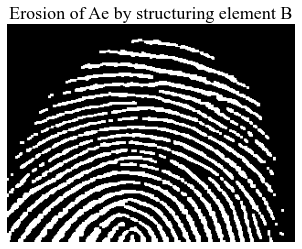

In [21]:
plt.title('Erosion of Ae by structuring element B', fontsize = 18)
plt.imshow(Af1,cmap='gray')
plt.axis('off')
plt.show()

In [22]:
Af2 = skimage.morphology.binary_closing(Ad1,B)

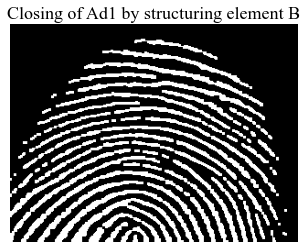

In [23]:
plt.title('Closing of Ad1 by structuring element B', fontsize = 18)
plt.imshow(Af1,cmap='gray')
plt.axis('off')
plt.show()

In [24]:
print('Maximum absolute difference of Af2 and Af1 is :')
print(np.max(Af2.astype(int) - Af1.astype(int)))

Maximum absolute difference of Af2 and Af1 is :
0


#### <span style='font-family:"Times New Roman"'>This satisfies the fact that erosion of a dilation is equivalent to a closing!

## <span style='font-family:"Times New Roman"'> <span styel=''>  (a-vi) Removing Holes:

### <span style='font-family:"Times New Roman"'> <span styel=''> filling the holes in image A:

In [25]:
Ag = skimage.morphology.remove_small_holes(np.array(A))

C:\Users\Szamen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.


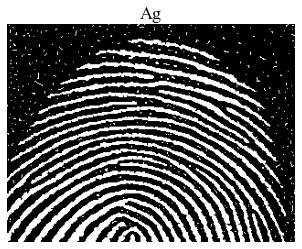

In [26]:
plt.title('Ag', fontsize = 18)
plt.imshow(Ag,cmap='gray')
plt.axis('off')
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''> (a-vii) Removing Small Regions:

In [27]:
Ah = skimage.morphology.remove_small_objects(Ag.astype(bool),29)

#### <span style='font-family:"Times New Roman"'> <span styel=''>The selection of 29 was based on trial and error. I could not find anything in literature to cite it.

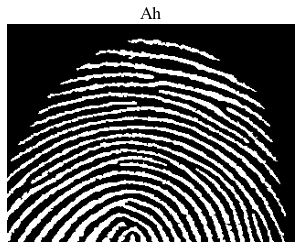

In [28]:
plt.title('Ah', fontsize = 18)
plt.imshow(Ah,cmap='gray')
plt.axis('off')
plt.show()

# <span style='font-family:"Times New Roman"'> <span styel=''>(b) Fingerprint Enhancement and Binarization.

#### <span style='font-family:"Times New Roman"'> <span styel=''> We will use Peter Kovesi’s implementation of the hong1998 [2] fingerprint enhancement algorithm, available at https://www.peterkovesi.com/matlabfns/#fingerprints
#### <span style='font-family:"Times New Roman"'> [2] Hong, Lin, Yifei Wan, and Anil Jain. "Fingerprint image enhancement: algorithm and performance evaluation." IEEE transactions on pattern analysis and machine intelligence 20, no. 8 (1998): 777-789.

In [29]:
sys.path.append("hong_enhancement\\src")

In [30]:
from image_enhance import image_enhance

## <span style='font-family:"Times New Roman"'> <span styel=''> (b-i) Code License Terms:

#### <span style='font-family:"Times New Roman"'>Based on the provided license, redistribution of this code with or without modification is allowed under certain condition:
#### <span style='font-family:"Times New Roman"'>1.	When redistributing source code, the provided copyright notice, list of conditions and disclaimer should be retained.
#### <span style='font-family:"Times New Roman"'>2.	When redistributing the code in binary form, the license, list of condition, and copyright disclaimer in documentation should be provided with other materials.  
#### <span style='font-family:"Times New Roman"'>As long as we are having the license file with our material, the use of this code with or without modification is allowed.
#### <span style='font-family:"Times New Roman"'>If we decide to post our code on the internet, we should make sure that the license file is placed within our materials. 
#### <span style='font-family:"Times New Roman"'>Based on the license, the owner of the code is not liable for any kind of damage caused by outcome of the code nor warranties any merchantability or subtility of any specific application.  

## <span style='font-family:"Times New Roman"'> <span styel=''> (b-ii) Generate Binary Images:

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this part, we will enhance and binarize the fingerprint images that we will use in this project. We will use Database 1 (DB1) [3] from the FVC2000 fingerprint recognition competition.
#### <span style='font-family:"Times New Roman"'>[3] http://bias.csr.unibo.it/fvc2000/Downloads/DB1_B.zip

In [31]:
#Setting directory for original images: 
image_directory = 'DB1_B'

#Sorting image files:
image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif') #Reading image
    i = image_enhance(I[f]) #using enhance function
    im = Image.fromarray(i) #converting array to image for saving
    im.save('DB1_B_binary\\' + name + '.tif', cmap='gray') #Saving Image as tif format
elapsed_time = time.time() - start_time

In [32]:
print('Elapsed Time (Seconds):')
print(elapsed_time)

Elapsed Time (Seconds):
193.44141149520874


# <span style='font-family:"Times New Roman"'> <span styel=''>(c) Minutiae Extraction.

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this part, we will extract minutiae from the binarized fingerprint images generated in part (b). This part will follow the basic concepts of the Bansal paper [3] with some modifications.
#### <span style='font-family:"Times New Roman"'>[3] Bansal, Roli, Priti Sehgal, and Punam Bedi. "Effective morphological extraction of true fingerprint minutiae based on the hit or miss transform." International Journal of Biometrics and Bioinformatics (IJBB) 4, no. 2 (2010): 71.

## <span style='font-family:"Times New Roman"'> <span styel=''>(c-i) Morphological Preprocessing:

### <span style='font-family:"Times New Roman"'> <span styel=''> Spur Removal:

### <span style='font-family:"Times New Roman"'> <span styel=''> In this step we will remove isolated 8-connected pixels.

In [33]:
I1011 = tif.imread('DB1_B_binary\\101_1.tif')

In [34]:
SRI1011 = skimage.morphology.remove_small_objects(I1011,1)

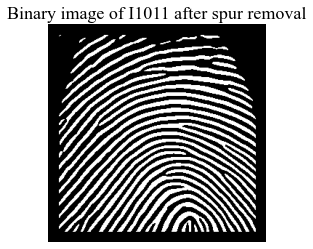

In [35]:
plt.title('Binary image of I1011 after spur removal', fontsize = 18)
plt.imshow(SRI1011,cmap='gray')
plt.axis('off')
plt.show()

In [36]:
print('Number of removed pixel from I1011 image is :')
print(np.sum(I1011) - np.sum(SRI1011))

Number of removed pixel from I1011 image is :
0


In [37]:
#Setting image files and save directories: 
image_directory = 'DB1_B_binary\\'
save_directory = 'DB1_B_binary_SR\\'

#Sorting the image files:
image_filenames = sorted(glob.glob(image_directory+'*.tif'))

#Looping over images:
start_time = time.time()
cnt = 0
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    SRI = skimage.morphology.remove_small_objects(I[f],1)
    if (np.sum(I[f]) - np.sum(SRI)) > 0:
        cnt = cnt + 1
    cntNSR = np.sum(I[f]) - np.sum(SRI)
    Totalcnt = np.append(Totalcnt, cntNSR)
    imsr = Image.fromarray(SRI)
    imsr.save(save_directory + name + '.tif', cmap='gray') #Saving Image as tif format
elapsed_time = time.time() - start_time

In [38]:
print('Total number of dataset images that had at least one spur pixel removed is :')
print(cnt)

print('Total number of spur pixels removed from the dataset is :')
print(np.sum(Totalcnt))

print('Elapsed Time :')
print(elapsed_time)

Total number of dataset images that had at least one spur pixel removed is :
0
Total number of spur pixels removed from the dataset is :
0.0
Elapsed Time :
5.200115203857422


### <span style='font-family:"Times New Roman"'> <span styel=''> Hole Removal:

In [39]:
HRI1011 = skimage.morphology.remove_small_holes(SRI1011)

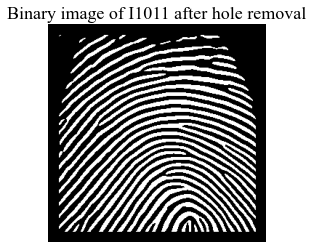

In [40]:
plt.title('Binary image of I1011 after hole removal', fontsize = 18)
plt.imshow(HRI1011,cmap='gray')
plt.axis('off')
plt.show()

In [41]:
print('Count of pixels that were filled by the hole removal operation is :')
print(np.sum(HRI1011) - np.sum(SRI1011))

Count of pixels that were filled by the hole removal operation is :
0


In [42]:
#Setting image files and save directories: 
image_directory = 'DB1_B_binary_SR\\'
save_directory = 'DB1_B_binary_HR\\'

#Sorting the image files:
image_filenames = sorted(glob.glob(image_directory+'*.tif'))

#Looping over images:
start_time = time.time()
cnt = 0
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    HRI = skimage.morphology.remove_small_holes(I[f])
    if (np.sum(HRI) - np.sum(I[f])) > 0:
        cnt = cnt + 1
    cntNHR =  np.sum(HRI) - np.sum(I[f])
    Totalcnt = np.append(Totalcnt, cntNHR)
    imhr = Image.fromarray(HRI)
    imhr.save(save_directory + name + '.tif', cmap='gray') #Saving Image as tif format
elapsed_time = time.time() - start_time

In [43]:
print('Total Number of images for which any hole pixels were filled is :')
print(cnt)

print('Total number of hole pixels filled from all the images is :')
print(np.sum(Totalcnt))

print('Elapsed Time :')
print(elapsed_time)

Total Number of images for which any hole pixels were filled is :
43
Total number of hole pixels filled from all the images is :
1474.0
Elapsed Time :
5.808927536010742


### <span style='font-family:"Times New Roman"'> <span styel=''> Island Removal:

In [44]:
IRI1011 = skimage.morphology.remove_small_objects(HRI1011, 9)

#### <span style='font-family:"Times New Roman"'> <span styel=''> According to [5], the island removal threshold is an empirical procedure and should be defined based on collected fingerprints. In our project, 9 seems like a good threshold for our island removal procedure.
#### <span style='font-family:"Times New Roman"'> <span styel=''> [5] Zhao, Feng, and Xiaoou Tang. "Preprocessing and postprocessing for skeleton-based fingerprint minutiae extraction." Pattern Recognition 40, no. 4 (2007): 1270-1281.

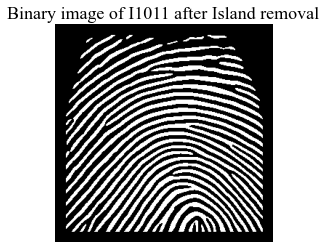

In [45]:
plt.title('Binary image of I1011 after Island removal', fontsize = 18)
plt.imshow(IRI1011,cmap='gray')
plt.axis('off')
plt.show()

In [46]:
#Setting image files and save directories: 
image_directory = 'DB1_B_binary_HR\\'
save_directory = 'DB1_B_binary_IR\\'

#Sorting the image files:
image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
cnt = 0
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    IRI = skimage.morphology.remove_small_objects(I[f], 8)
    if (np.sum(I[f]) - np.sum(IRI)) > 0:
        cnt = cnt + 1
    cntNIR =   np.sum(I[f]) - np.sum(IRI)
    Totalcnt = np.append(Totalcnt, cntNIR)
    imir = Image.fromarray(IRI)
    imir.save(save_directory + name + '.tif', cmap='gray') #Saving Image as tif format
elapsed_time = time.time() - start_time

In [47]:
print('Total number of dataset images that had at least one pixel removed is :')
print(cnt)

print('Total number of Island pixels removed from the dataset is :')
print(np.sum(Totalcnt))

print('Elapsed Time :')
print(elapsed_time)

Total number of dataset images that had at least one pixel removed is :
80
Total number of Island pixels removed from the dataset is :
3677.0
Elapsed Time :
5.95060396194458


## <span style='font-family:"Times New Roman"'> <span styel=''> (c-ii) Thinning:

In [48]:
TI1011 = skimage.morphology.thin(IRI1011, max_iter = None)
# max_iter = 'None' to allow the algorithm to run to convergence

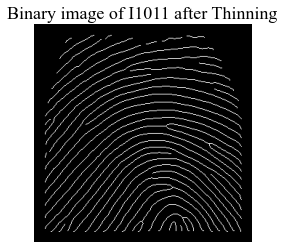

In [49]:
plt.title('Binary image of I1011 after Thinning', fontsize = 18)
plt.imshow(TI1011,cmap='gray')
plt.axis('off')
plt.show()

In [50]:
print('Percentage of foreground pixels remaining is :')
print(((np.sum(TI1011)) / np.sum(IRI1011)) * 100)

Percentage of foreground pixels remaining is :
19.37971611873816


In [51]:
#Setting image files and save directories: 
image_directory = 'DB1_B_binary_IR\\'
save_directory = 'DB1_B_binary_TH\\'

#Sorting the image files:
image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
cnt = 0
Totalcnt = []
TotalcntIR = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    THI = skimage.morphology.thin(I[f], max_iter = None)
    cntIR = np.sum(I[f])
    TotalcntIR = np.append(TotalcntIR, cntIR)
    cntTHI =   np.sum(THI)
    Totalcnt = np.append(Totalcnt, cntTHI)
    imth = Image.fromarray(THI)
    imth.save(save_directory + name + '.tif', cmap='gray') #Saving Image as tif format
elapsed_time = time.time() - start_time

In [52]:
print('Percentage of pixels remaining across the dataset is :')
print((np.sum(Totalcnt)/ np.sum(TotalcntIR)) * 100)

print('Elapsed Time :')
print(elapsed_time)

Percentage of pixels remaining across the dataset is :
23.98550106226728
Elapsed Time :
6.921599626541138


## <span style='font-family:"Times New Roman"'> <span styel=''>(c-iii) Minutiae Extraction—Ridge Endings (REs):

#### <span style='font-family:"Times New Roman"'> <span styel=''>Here, we will define the eight foreground and eight background structuring elements (strels) for detection of REs as described in the bansal [3]. We will then use the hit or miss transform (HMT) as described in the bansal [3]. Finally, we will remove spurious REs at the edge of the detected ridge area using a simple masking operation.

In [53]:
RE11 = np.array([[0, 1, 0], [0, 1, 0], [0, 0, 0]], dtype = 'uint8')
RE12 = np.array([[0, 0, 0], [0, 1, 1], [0, 0, 0]], dtype = 'uint8')
RE13 = np.array([[0, 0, 0], [0, 1, 0], [0, 1, 0]], dtype = 'uint8')
RE14 = np.array([[0, 0, 0], [1, 1, 0], [0, 0, 0]], dtype = 'uint8')
RE15 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]], dtype = 'uint8')
RE16 = np.array([[0, 0, 1], [0, 1, 0], [0, 0, 0]], dtype = 'uint8')
RE17 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 1]], dtype = 'uint8')
RE18 = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]], dtype = 'uint8')
RE21 = 1 - RE11
RE22 = 1 - RE12
RE23 = 1 - RE13
RE24 = 1 - RE14
RE25 = 1 - RE15
RE26 = 1 - RE16
RE27 = 1 - RE17
RE28 = 1 - RE18

In [54]:
HM1 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE11,RE21)
HM2 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE12,RE22)
HM3 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE13,RE23)
HM4 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE14,RE24)
HM5 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE15,RE25)
HM6 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE16,RE26)
HM7 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE17,RE27)
HM8 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RE18,RE28)

In [55]:
I_RE = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8))

In [56]:
loc_RE = np.nonzero(I_RE)

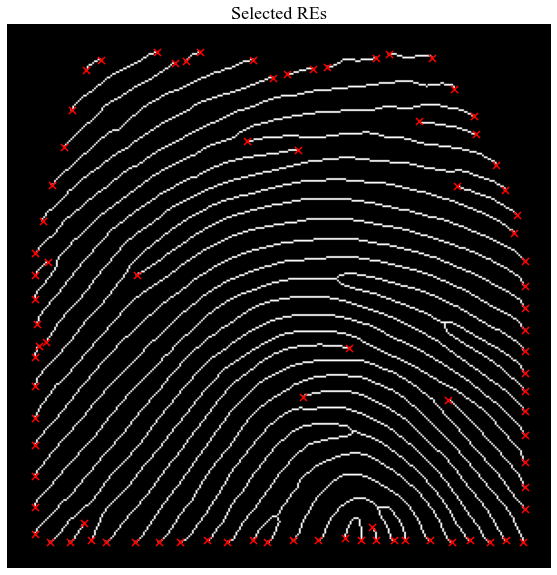

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(TI1011, cmap='gray')
plt.scatter(loc_RE[1],loc_RE[0], marker = "x", s = 50, color='r')
plt.axis('off')
plt.title('Selected REs', fontsize = 18)
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''> As it is clear from provided image, the selected Res are not legit ridge endings. The applied procedure has selected end of the ridges caused by sensor capacity as Res. For this, we define a simple mask based on individual images to avoid selecting spurious REs. 

In [58]:
print('Number of detected REs in I1011 is:')
print(len(loc_RE[0]))

Number of detected REs in I1011 is:
85


In [59]:
mask = np.zeros((300,300))
mask[np.min(loc_RE[1]) + 2:np.max(loc_RE[1]) - 2,np.min(loc_RE[0]) + 2:np.max(loc_RE[0]) - 2] = 1
Maskedloc_RE = np.nonzero(I_RE*mask)

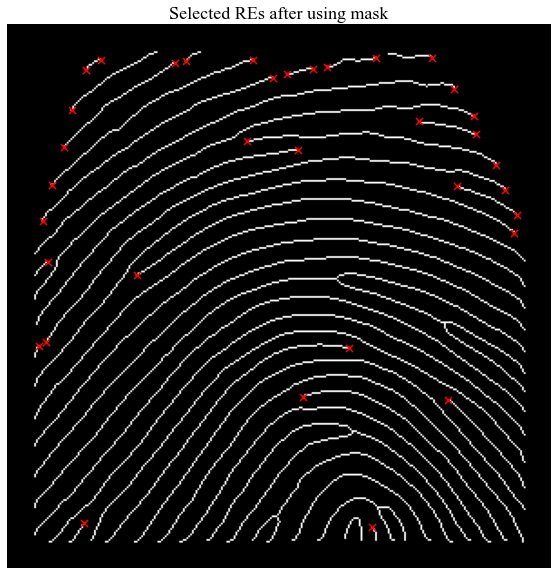

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(TI1011, cmap='gray')
plt.scatter(Maskedloc_RE[1],Maskedloc_RE[0], marker = "x", s = 50, color='r')
plt.axis('off')
plt.title('Selected REs after using mask', fontsize = 18)
plt.show()

In [61]:
print('Number of detected REs after implementing mask in I1011 is:')
print(len(Maskedloc_RE[0]))

Number of detected REs after implementing mask in I1011 is:
35


In [62]:
#Setting image and segmentation files directories: 
image_directory = 'DB1_B_binary_TH\\'

#Saving image files’ name and sorting them:
image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    HM1 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE11,RE21)
    HM2 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE12,RE22)
    HM3 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE13,RE23)
    HM4 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE14,RE24)
    HM5 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE15,RE25)
    HM6 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE16,RE26)
    HM7 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE17,RE27)
    HM8 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE18,RE28)
    I_RE_T = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8))
    loc_RE = np.nonzero(I_RE_T)
    mask = np.zeros((300,300))
    mask[np.min(loc_RE[1]) + 2:np.max(loc_RE[1]) - 2,np.min(loc_RE[0]) + 2:np.max(loc_RE[0]) - 2] = 1
    Maskedloc_RE = np.nonzero(I_RE_T*mask)
    Totalcnt = np.append(Totalcnt, Maskedloc_RE[0].size)
    
elapsed_time = time.time() - start_time

In [63]:
print('The maximum number of detected REs across the 80 dataset images is:')
print(np.max(Totalcnt))
print('The minimum number of detected REs across the 80 dataset images is:')
print(np.min(Totalcnt))
print('The average number of detected REs across the 80 dataset images is:')
print(np.mean(Totalcnt))
print('Elapsed time is (sec) :')
print(elapsed_time)

The maximum number of detected REs across the 80 dataset images is:
364.0
The minimum number of detected REs across the 80 dataset images is:
15.0
The average number of detected REs across the 80 dataset images is:
98.1
Elapsed time is (sec) :
6.611474990844727


## <span style='font-family:"Times New Roman"'> <span styel=''> (c-iv) Minutiae Extraction—Ridge Bifurcations (RB):

#### <span style='font-family:"Times New Roman"'> <span styel=''> Here, we follow a similar approach for detection of RBs. We will define the eight foreground and eight background strels for detection of RBs as described in the bansal [3].

In [64]:
RB11 = np.array([[0, 0, 1], [1, 1, 0], [0, 0, 1]], dtype = 'uint8')
RB12 = np.array([[0, 1, 0], [0, 1, 0], [1, 0, 1]], dtype = 'uint8')
RB13 = np.array([[1, 0, 0], [0, 1, 1], [1, 0, 0]], dtype = 'uint8')
RB14 = np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]], dtype = 'uint8')
RB15 = np.array([[0, 1, 0], [0, 1, 1], [1, 0, 0]], dtype = 'uint8')
RB16 = np.array([[1, 0, 0], [0, 1, 1], [0, 1, 0]], dtype = 'uint8')
RB17 = np.array([[0, 0, 1], [1, 1, 0], [0, 1, 0]], dtype = 'uint8')
RB18 = np.array([[0, 1, 0], [1, 1, 0], [0, 0, 1]], dtype = 'uint8')
RB21 = 1 - RB11
RB22 = 1 - RB12
RB23 = 1 - RB13
RB24 = 1 - RB14
RB25 = 1 - RB15
RB26 = 1 - RB16
RB27 = 1 - RB17
RB28 = 1 - RB18

In [65]:
HM1 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB11,RB21)
HM2 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB12,RB22)
HM3 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB13,RB23)
HM4 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB14,RB24)
HM5 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB15,RB25)
HM6 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB16,RB26)
HM7 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB17,RB27)
HM8 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB18,RB28)

In [66]:
I_RB = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8))

In [67]:
loc_RB = np.nonzero(I_RB)

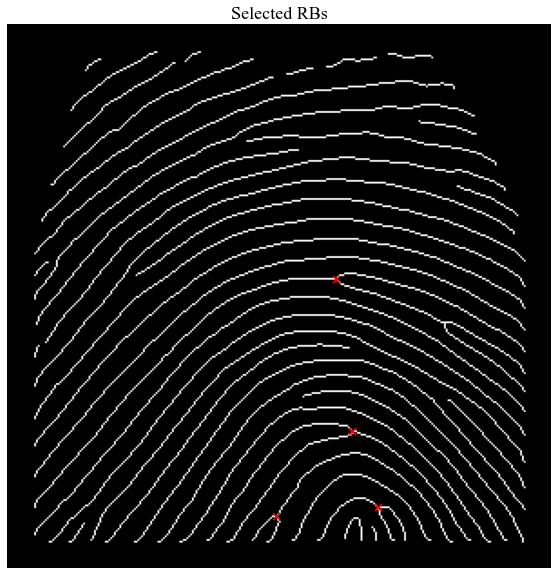

In [68]:
plt.figure(figsize=(10,10))
plt.imshow(TI1011, cmap='gray')
plt.scatter(loc_RB[1],loc_RB[0], marker = "x", s = 50, color='r')
plt.axis('off')
plt.title('Selected RBs', fontsize = 18)
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>As displayed in image, the limited number of structuring elements fail to detect all RBs. Hence we will add more structuring elements to capture all RBs in images. The reasoning behind these structuring elements are the cases that have not been detected in last section. I scrutinized one of the RBs that has not been detected and defined my structuring element based on that. Then, I rotate my structuring elements 90 degrees three times to get all possible structuring elements. 

In [69]:
#Setting image directorys: 
image_directory = 'DB1_B_binary_TH\\'

#Saving image files’ name and sorting them:
image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    HM1 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB11,RB21)
    HM2 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB12,RB22)
    HM3 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB13,RB23)
    HM4 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB14,RB24)
    HM5 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB15,RB25)
    HM6 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB16,RB26)
    HM7 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB17,RB27)
    HM8 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB18,RB28)
    I_RB_T = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8))
    Maskedloc_RB = np.nonzero(I_RB_T)
    Totalcnt = np.append(Totalcnt, Maskedloc_RB[0].size)
    
elapsed_time = time.time() - start_time

In [70]:
print('The maximum number of detected RBs across the 80 dataset images is:')
print(np.max(Totalcnt))
print('The minimum number of detected RBs across the 80 dataset images is:')
print(np.min(Totalcnt))
print('The average number of detected RBs across the 80 dataset images is:')
print(np.mean(Totalcnt))
print('Elapsed time is (sec) :')
print(elapsed_time)

The maximum number of detected RBs across the 80 dataset images is:
23.0
The minimum number of detected RBs across the 80 dataset images is:
3.0
The average number of detected RBs across the 80 dataset images is:
9.9625
Elapsed time is (sec) :
6.120627164840698


#### <span style='font-family:"Times New Roman"'> <span styel=''> Defining more structural elements to capture all RBs.

In [71]:
RB11 = np.array([[0, 0, 1], [1, 1, 0], [0, 0, 1]], dtype = 'uint8')
RB12 = np.array([[0, 1, 0], [0, 1, 0], [1, 0, 1]], dtype = 'uint8')
RB13 = np.array([[1, 0, 0], [0, 1, 1], [1, 0, 0]], dtype = 'uint8')
RB14 = np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]], dtype = 'uint8')
RB15 = np.array([[0, 1, 0], [0, 1, 1], [1, 0, 0]], dtype = 'uint8')
RB16 = np.array([[1, 0, 0], [0, 1, 1], [0, 1, 0]], dtype = 'uint8')
RB17 = np.array([[0, 0, 1], [1, 1, 0], [0, 1, 0]], dtype = 'uint8')
RB18 = np.array([[0, 1, 0], [1, 1, 0], [0, 0, 1]], dtype = 'uint8')
RB19 = np.array([[0, 1, 0], [1, 1, 1], [0, 0, 0]], dtype = 'uint8')
RB110 = np.array([[0, 0, 0], [1, 1, 1], [0, 1, 0]], dtype = 'uint8')
RB111 = np.array([[0, 1, 0], [1, 1, 0], [0, 1, 0]], dtype = 'uint8')
RB112 = np.array([[0, 1, 0], [0, 1, 1], [0, 1, 0]], dtype = 'uint8')
RB113 = np.array([[0, 1, 0], [1, 1, 0], [0, 1, 1]], dtype = 'uint8')
RB114 = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 0]], dtype = 'uint8')
RB115 = np.array([[1, 0, 1], [0, 1, 0], [0, 0, 1]], dtype = 'uint8')
RB116 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 1]], dtype = 'uint8')
RB21 = 1 - RB11
RB22 = 1 - RB12
RB23 = 1 - RB13
RB24 = 1 - RB14
RB25 = 1 - RB15
RB26 = 1 - RB16
RB27 = 1 - RB17
RB28 = 1 - RB18
RB29 = 1 - RB19
RB210 = 1 - RB110
RB211 = 1 - RB111
RB212 = 1 - RB112
RB213 = 1 - RB113
RB214 = 1 - RB114
RB215 = 1 - RB115
RB216 = 1 - RB116

In [72]:
image_directory = 'DB1_B_binary_TH\\'

image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    HM1 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB11,RB21)
    HM2 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB12,RB22)
    HM3 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB13,RB23)
    HM4 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB14,RB24)
    HM5 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB15,RB25)
    HM6 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB16,RB26)
    HM7 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB17,RB27)
    HM8 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB18,RB28)
    HM9 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB19,RB29)
    HM10 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB110,RB210)
    HM11 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB111,RB211)
    HM12 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB112,RB212)
    HM13 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB113,RB213)
    HM14 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB114,RB214)
    HM15 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB115,RB215)
    HM16 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB116,RB216)
    I_RB_T = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8, HM9\
                                  , HM10, HM11, HM12, HM13, HM14, HM15, HM16))
    Maskedloc_RB = np.nonzero(I_RB_T)
    Totalcnt = np.append(Totalcnt, Maskedloc_RB[0].size)
    
elapsed_time = time.time() - start_time

In [73]:
print('The maximum number of detected RBs across the 80 dataset images is:')
print(np.max(Totalcnt))
print('The minimum number of detected RBs across the 80 dataset images is:')
print(np.min(Totalcnt))
print('The average number of detected RBs across the 80 dataset images is:')
print(np.mean(Totalcnt))
print('Elapsed time is (sec) :')
print(elapsed_time)

The maximum number of detected RBs across the 80 dataset images is:
29.0
The minimum number of detected RBs across the 80 dataset images is:
3.0
The average number of detected RBs across the 80 dataset images is:
12.55
Elapsed time is (sec) :
7.11599326133728


## <span style='font-family:"Times New Roman"'> <span styel=''>(c-v) Postprocessing:

#### <span style='font-family:"Times New Roman"'> <span styel=''> Here, we simply remove any minutiae (REs or RBs) that are within some distance threshold T pixels of each other

In [74]:
Maskedloc_RE = np.nonzero(I_RE*mask)

In [75]:
HM1 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB11,RB21)
HM2 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB12,RB22)
HM3 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB13,RB23)
HM4 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB14,RB24)
HM5 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB15,RB25)
HM6 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB16,RB26)
HM7 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB17,RB27)
HM8 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB18,RB28)
HM9 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB19,RB29)
HM10 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB110,RB210)
HM11 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB111,RB211)
HM12 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB112,RB212)
HM13 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB113,RB213)
HM14 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB114,RB214)
HM15 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB115,RB215)
HM16 = scipy.ndimage.morphology.binary_hit_or_miss(TI1011,RB116,RB216)
I_RB = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8, HM9\
                                , HM10, HM11, HM12, HM13, HM14, HM15, HM16))

In [76]:
loc_RB = np.nonzero(I_RB)

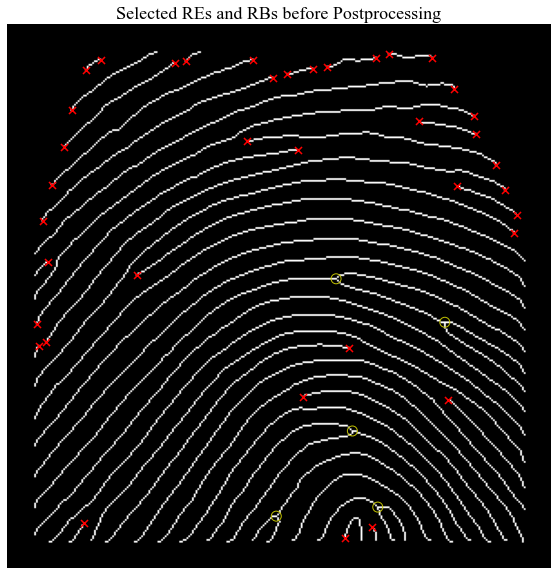

In [77]:
plt.figure(figsize=(10,10))
plt.imshow(TI1011, cmap='gray')
plt.scatter(Maskedloc_RE[1],Maskedloc_RE[0], marker = "x", s = 50, color='r')
plt.scatter(loc_RB[1],loc_RB[0], marker = "o", s = 100, color="none", edgecolor="y")
plt.axis('off')
plt.title('Selected REs and RBs before Postprocessing', fontsize = 18)
plt.show()

In [78]:
T = 10 #Estimated inter-ridge distance as threshold

#### <span style='font-family:"Times New Roman"'> <span styel=''>For postprocessing, I have considered Res and RBs separately. 

In [79]:
# This section is a compact code that removes any points that are in specefic distance from each other
a,b = np.tril_indices(Maskedloc_RE[0].size, -1)
x = np.asarray(Maskedloc_RE).T
diss = np.linalg.norm(x[b] - x[a], axis=1)
removedRE = np.delete(x,np.unique(np.concatenate([b[diss < T], a[diss < T]])), axis=0)

In [80]:
a,b = np.tril_indices(loc_RB[0].size, -1)
x = np.asarray(loc_RB).T
diss = np.linalg.norm(x[b] - x[a], axis=1)
removedRB = np.delete(x,np.unique(np.concatenate([b[diss < T], a[diss < T]])), axis=0)

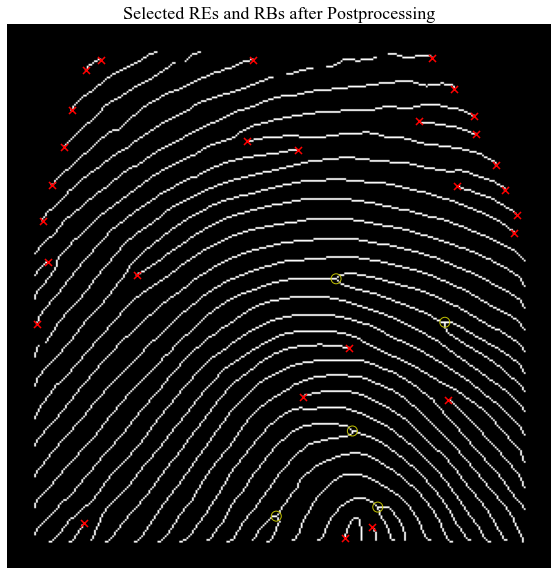

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(TI1011, cmap='gray')
plt.scatter(removedRE[:,1],removedRE[:,0], marker = "x", s = 50, color='r')
plt.scatter(removedRB [:,1],removedRB [:,0], marker = "o", s = 100, color="none", edgecolor="y")
plt.axis('off')
plt.title('Selected REs and RBs after Postprocessing', fontsize = 18)
plt.show()

In [82]:
print("Total number of REs before postprocessing is :")
print(Maskedloc_RE[0].size)
print("Total number of REs after postprocessing is :")
print(removedRE.shape[0])
print("Total number of RBs before postprocessing is :")
print(loc_RB[0].size)
print("Total number of RBs after postprocessing is :")
print(removedRB.shape[0])

Total number of REs before postprocessing is :
38
Total number of REs after postprocessing is :
28
Total number of RBs before postprocessing is :
5
Total number of RBs after postprocessing is :
5


In [83]:
image_directory = 'DB1_B_binary_TH\\'

image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    HM1 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE11,RE21)
    HM2 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE12,RE22)
    HM3 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE13,RE23)
    HM4 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE14,RE24)
    HM5 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE15,RE25)
    HM6 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE16,RE26)
    HM7 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE17,RE27)
    HM8 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RE18,RE28)
    I_RE_T = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8))
    loc_RE = np.nonzero(I_RE_T)
    mask = np.zeros((300,300))
    mask[np.min(loc_RE[1]) + 2:np.max(loc_RE[1]) - 2,np.min(loc_RE[0]) + 2:np.max(loc_RE[0]) - 2] = 1
    Maskedloc_RE_DS = np.nonzero(I_RE_T*mask)
    a,b = np.tril_indices(Maskedloc_RE_DS[0].size, -1)
    x = np.asarray(Maskedloc_RE_DS).T
    diss = np.linalg.norm(x[b] - x[a], axis=1)
    removedRE_DS = np.delete(x,np.unique(np.concatenate([b[diss < T], a[diss < T]])), axis=0)
    Totalcnt = np.append(Totalcnt, removedRE_DS.shape[0])
    
elapsed_time = time.time() - start_time

In [84]:
print('The maximum number of detected REs across the 80 dataset images after postprocessing is:')
print(np.max(Totalcnt))
print('The minimum number of detected REs across the 80 dataset images after postprocessing is:')
print(np.min(Totalcnt))
print('The average number of detected REs across the 80 dataset images after postprocessing is:')
print(np.mean(Totalcnt))
print('Elapsed time is (sec) :')
print(elapsed_time)

The maximum number of detected REs across the 80 dataset images after postprocessing is:
52.0
The minimum number of detected REs across the 80 dataset images after postprocessing is:
13.0
The average number of detected REs across the 80 dataset images after postprocessing is:
34.4125
Elapsed time is (sec) :
6.291198015213013


In [85]:
image_directory = 'DB1_B_binary_TH\\'

image_filenames = sorted(glob.glob(image_directory+'\\*.tif'))

#Looping over images:
start_time = time.time()
Totalcnt = []
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filename)[:-4]
    I= tif.imread(image_directory+'\\*.tif')
    HM1 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB11,RB21)
    HM2 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB12,RB22)
    HM3 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB13,RB23)
    HM4 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB14,RB24)
    HM5 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB15,RB25)
    HM6 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB16,RB26)
    HM7 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB17,RB27)
    HM8 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB18,RB28)
    HM9 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB19,RB29)
    HM10 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB110,RB210)
    HM11 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB111,RB211)
    HM12 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB112,RB212)
    HM13 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB113,RB213)
    HM14 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB114,RB214)
    HM15 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB115,RB215)
    HM16 = scipy.ndimage.morphology.binary_hit_or_miss(I[f],RB116,RB216)
    I_RB_T = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8, HM9\
                                  , HM10, HM11, HM12, HM13, HM14, HM15, HM16))
    Maskedloc_RB_DS = np.nonzero(I_RB_T)
    a,b = np.tril_indices(Maskedloc_RB_DS[0].size, -1)
    x = np.asarray(Maskedloc_RB_DS).T
    diss = np.linalg.norm(x[b] - x[a], axis=1)
    removedRB_DS = np.delete(x,np.unique(np.concatenate([b[diss < T], a[diss < T]])), axis=0)
    Totalcnt = np.append(Totalcnt, removedRB_DS.shape[0])
    
elapsed_time = time.time() - start_time

In [86]:
print('The maximum number of detected RBs across the 80 dataset images after postprocessing is:')
print(np.max(Totalcnt))
print('The minimum number of detected RBs across the 80 dataset images after postprocessing is:')
print(np.min(Totalcnt))
print('The average number of detected RBs across the 80 dataset images after postprocessing is:')
print(np.mean(Totalcnt))
print('Elapsed time is (sec) :')
print(elapsed_time)

The maximum number of detected RBs across the 80 dataset images after postprocessing is:
28.0
The minimum number of detected RBs across the 80 dataset images after postprocessing is:
3.0
The average number of detected RBs across the 80 dataset images after postprocessing is:
11.9125
Elapsed time is (sec) :
7.118983268737793


# <span style='font-family:"Times New Roman"'> <span styel=''>(d) Minutiae Matching.

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this part you will implement the minutiae matching algorithm described in the Jiang [6] with some modifications.
#### <span style='font-family:"Times New Roman"'> <span styel=''> [6] Jiang, Xudong, and Wei-Yun Yau. "Fingerprint minutiae matching based on the local and global structures." In Proceedings 15th international conference on pattern recognition. ICPR-2000, vol. 2, pp. 1038-1041. IEEE, 2000.

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-i) Extract Feature Vector:

In [87]:
from ridge_orient import ridge_orient

In [88]:
x_k = np.concatenate((removedRE[:,1], removedRB [:,1]))
y_k = np.concatenate((removedRE[:,0], removedRB [:,0]))
orient = ridge_orient(TI1011, 1, 7, 7)   #Parameters should be tuned for our images 
orientimage = np.asarray(orient)
phi_k = orientimage[x_k,y_k]
t_k = np.concatenate((np.zeros(removedRE.shape[0]), np.ones(removedRB.shape[0])))
#zero for REs and one for RBs

In [89]:
F_template = np.asarray([x_k, y_k, phi_k, t_k])

In [90]:
FM = F_template[:,2]
SM = F_template[:,30]

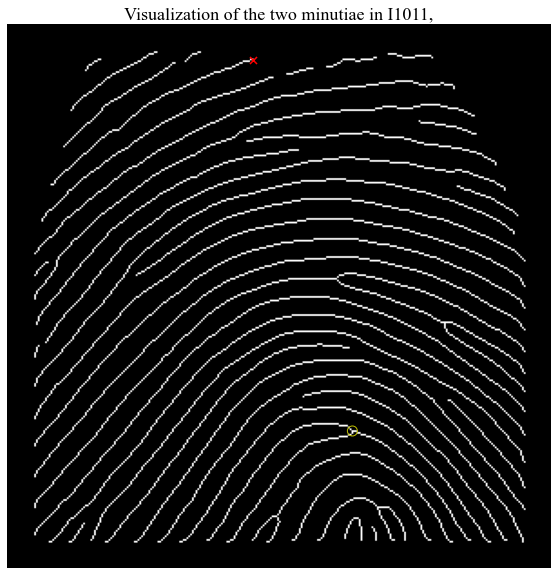

In [91]:
plt.figure(figsize=(10,10))
plt.imshow(TI1011, cmap='gray')
plt.scatter(FM[0],FM[1], marker = "x", s = 50, color='r')
plt.scatter(SM[0],SM[1], marker = "o", s = 100, color="none", edgecolor="y")
plt.axis('off')
plt.title('Visualization of the two minutiae in I1011,', fontsize = 18)
plt.show()

In [92]:
print('The x coordinate of first minutia is:')
print(FM[0])
print('The y coordinate of first minutia is:')
print(FM[1])
print('The local local ridge direction of first minutia is:')
print(FM[2])
print('The type of first minutia is:')
print(FM[3])

The x coordinate of first minutia is:
135.0
The y coordinate of first minutia is:
19.0
The local local ridge direction of first minutia is:
2.2504786701453883
The type of first minutia is:
0.0


In [93]:
print('The x coordinate of second minutia is:')
print(SM[0])
print('The y coordinate of second minutia is:')
print(SM[1])
print('The local local ridge direction of second minutia is:')
print(SM[2])
print('The type of second minutia is:')
print(SM[3])

The x coordinate of second minutia is:
190.0
The y coordinate of second minutia is:
224.0
The local local ridge direction of second minutia is:
0.5895383655879416
The type of second minutia is:
1.0


#### <span style='font-family:"Times New Roman"'> <span styel=''> The x, y, and minutiae values are the ones we were expecting and could be verified by visualization image. However, the local ridge ending is an abstract definition and cannot be estimated by looking at the image visualization.  

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-ii) Compute Local Feature Matrix:

#### <span style='font-family:"Times New Roman"'> <span styel=''>Function for equation 2 of Jiang [6]:

In [94]:
def dphi(t1,t2):
    if (t1 - t2 <= math.pi) & (t1 - t2 > -(math.pi)):
        dphi = t1 - t2
    elif (t1-t2) <= -(math.pi):
        dphi = 2 * (math.pi) + t1 - t2
    else:
        dphi = 2 * (math.pi) - t1 + t2
    return dphi

#### <span style='font-family:"Times New Roman"'> <span styel=''>Function for equation 6 of Jiang [6]:

In [95]:
def FMN(F_template, N):
    x_k = F_template[0,:]
    y_k = F_template[1,:]
    phi_k = F_template[2,:]
    t_k = F_template[3,:]
    diss = np.zeros((x_k.shape[0],y_k.shape[0]))
    F3k_template = np.zeros((9,x_k.shape[0]))
    for i in range(len(x_k)):
        for j in range(len(y_k)):
            diss[i,j] = distance.euclidean((x_k[i],y_k[i]),(x_k[j],y_k[j]))
    for k in range (x_k.shape[0]):
        FirstNloc = np.where(diss[k,:] == nsmallest(2, diss[k,:])[-1])
        SecondNloc = np.where(diss[k,:] == nsmallest(3, diss[k,:])[-1])
        Kminutia = F_template[:,N]
        iminutia = F_template[:,FirstNloc]
        jminutia = F_template[:,SecondNloc]
        dki = nsmallest(2, diss[k,:])[-1]
        dkj = nsmallest(3, diss[k,:])[-1]
        thetaki = dphi(math.atan2(Kminutia[1]-iminutia[1,0,0],Kminutia[0]-iminutia[0,0,0]), Kminutia[2])
        thetakj = dphi(math.atan2(Kminutia[1]-jminutia[1,0,0],Kminutia[0]-jminutia[0,0,0]), Kminutia[2])
        phiki = dphi(Kminutia[2],iminutia[2,0,0])
        phikj = dphi(Kminutia[2],jminutia[2,0,0])
        tk = Kminutia[3]
        ti = iminutia[3,0,0]
        tj = jminutia[3,0,0]
        F3k = [dki, dkj, thetaki, thetakj, phiki, phikj, tk, ti, tj]
        F3k_template[:,k] = np.asarray(F3k, dtype=np.float64)
    print('Local feature vectors associated with minutiae is')
    print(F3k_template[:,N])
    return (F3k_template.T)

#### <span style='font-family:"Times New Roman"'> <span styel=''>Function for plotting minutia and its two closet minutiae::

In [96]:
def FMN_plt(TI, F_template, N):
    x_k = F_template[0,:]
    y_k = F_template[1,:]
    phi_k = F_template[2,:]
    t_k = F_template[3,:]
    diss = np.zeros((x_k.shape[0],y_k.shape[0]))
    for i in range(len(x_k)):
        for j in range(len(y_k)):
            diss[i,j] = distance.euclidean((x_k[i],y_k[i]),(x_k[j],y_k[j]))
    FirstNloc = np.where(diss[N,:] == nsmallest(2, diss[N,:])[-1])
    SecondNloc = np.where(diss[N,:] == nsmallest(3, diss[N,:])[-1])
    Kminutia = F_template[:,N]
    iminutia = F_template[:,FirstNloc]
    jminutia = F_template[:,SecondNloc]
    plt.figure(figsize=(10,10))
    plt.imshow(TI, cmap='gray')
    plt.scatter(Kminutia[0],Kminutia[1], marker = "x", s = 50, color='r', label="Minutia")
    plt.scatter(iminutia[0],iminutia[1], marker = "x", s = 100, color="y", label="Minutia's 2 Nearest Neighbors")
    plt.scatter(jminutia[0],jminutia[1], marker = "x", s = 100, color="y")
    plt.axis('off')
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

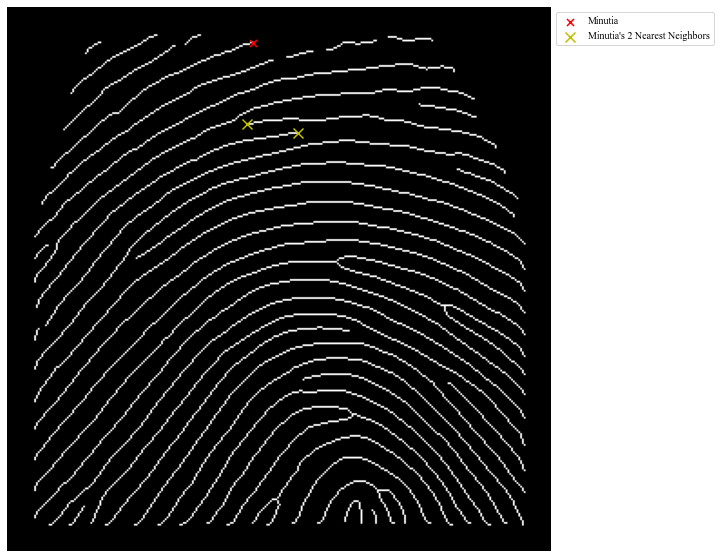

In [97]:
FMN_plt(TI1011, F_template, 2)

In [98]:
F3k_template = FMN(F_template, 2)

Local feature vectors associated with minutiae is
[45.09988914 55.90169944  2.52847847  1.9982627  -0.08640218 -0.11616652
  0.          0.          0.        ]


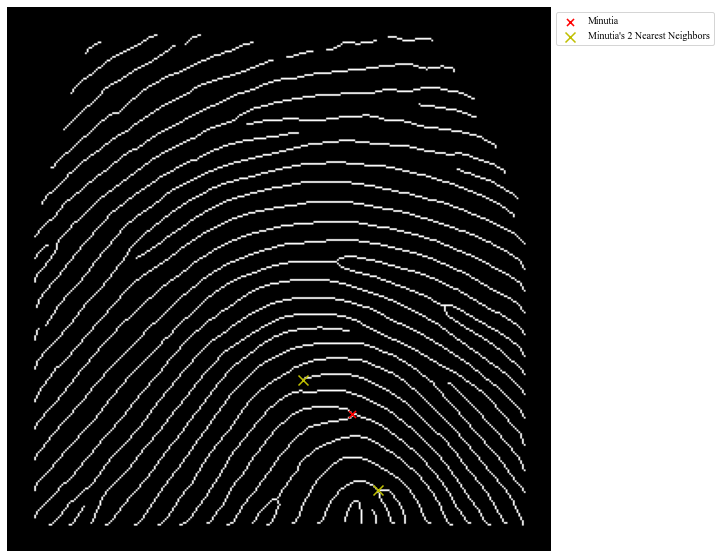

In [99]:
FMN_plt(TI1011, F_template, 30)

In [100]:
F3k_template = FMN(F_template, 30)

Local feature vectors associated with minutiae is
[ 3.30151480e+01  4.42718872e+01  2.36689833e-02 -2.48208525e+00
  1.35315927e-01 -1.34818754e-01  1.00000000e+00  0.00000000e+00
  1.00000000e+00]


#### <span style='font-family:"Times New Roman"'> <span styel=''>The result for two different minutiae and their neighbors seems reasonable. The minutia type and their neighbors’ type are correct (Last three rows). The Euclidean distance between minutia and two nearest minutiae are reasonable (First two rows). Finally, the that value (third and fourth rows) are reasonable two. For instance, in the first image, one expects to get theta value close to each other which is the case here. On contrast, in second image, we have two theta values are having different sign but close absolute values.   

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-iii) Similarity Level Function:

In [101]:
def similarity_level(F3k_image,F3k_template):
    sl = np.zeros((F3k_image.shape[0],F3k_template.shape[0]))
    W = np.array([1, 1, 0.3*180 / math.pi, 0.3*180 / math.pi, 0.3*180 / math.pi, 0.3*180 / math.pi, 3, 3, 3])
    W = W.reshape((1, 9))
    for i in range (F3k_image.shape[0]):
        for j in range (F3k_template.shape[0]):
            h = np.abs(F3k_image[i,:]-F3k_template[j,:])
            h = h.reshape((9, 1))
            if (np.matmul(W,h) < 54):
                sl[i,j] = (54 - np.matmul(W,h))/54
            else:
                sl[i,j] = 0
    return sl

In [140]:
def EFV(IFinal, T):
    HM1 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE11,RE21)
    HM2 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE12,RE22)
    HM3 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE13,RE23)
    HM4 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE14,RE24)
    HM5 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE15,RE25)
    HM6 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE16,RE26)
    HM7 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE17,RE27)
    HM8 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RE18,RE28)
    IRE = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8))
    locRE = np.nonzero(IRE)
    mask = np.zeros((300,300))
    mask[np.min(locRE[1]) + 2:np.max(locRE[1]) - 2,np.min(locRE[0]) + 2:np.max(locRE[0]) - 2] = 1
    MaskedlocRE = np.nonzero(IRE*mask)
    HM1 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB11,RB21)
    HM2 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB12,RB22)
    HM3 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB13,RB23)
    HM4 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB14,RB24)
    HM5 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB15,RB25)
    HM6 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB16,RB26)
    HM7 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB17,RB27)
    HM8 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB18,RB28)
    HM9 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB19,RB29)
    HM10 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB110,RB210)
    HM11 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB111,RB211)
    HM12 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB112,RB212)
    HM13 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB113,RB213)
    HM14 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB114,RB214)
    HM15 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB115,RB215)
    HM16 = scipy.ndimage.morphology.binary_hit_or_miss(IFinal,RB116,RB216)
    IRBT = np.logical_or.reduce((HM1, HM2, HM3, HM4, HM5, HM6, HM7, HM8, HM9\
                                  , HM10, HM11, HM12, HM13, HM14, HM15, HM16))
    locRB = np.nonzero(IRBT)
    MaskedlocRB = np.nonzero(locRB)
    a,b = np.tril_indices(MaskedlocRE[0].size, -1)
    x = np.asarray(MaskedlocRE).T
    diss = np.linalg.norm(x[b] - x[a], axis=1)
    removedRE = np.delete(x,np.unique(np.concatenate([b[diss < T], a[diss < T]])), axis=0)
    a,b = np.tril_indices(locRB[0].size, -1)
    x = np.asarray(locRB).T
    diss = np.linalg.norm(x[b] - x[a], axis=1)
    removedRB = np.delete(x,np.unique(np.concatenate([b[diss < T], a[diss < T]])), axis=0)
    xk = np.concatenate((removedRE[:,1], removedRB [:,1]))
    yk = np.concatenate((removedRE[:,0], removedRB [:,0]))
    orient = ridge_orient(IFinal, 1, 7, 7)
    orientimage = np.asarray(orient)
    phik = orientimage[xk,yk]
    tk = np.concatenate((np.zeros(removedRE.shape[0]), np.ones(removedRB.shape[0])))
    Ftemplate = np.asarray([xk, yk, phik, tk])
    return Ftemplate

In [103]:
ITemp = tif.imread('DB1_B_binary_TH\\101_1.tif')
F3k_temp = EFV(ITemp, 10)
F3k_template = FMN(F3k_temp, 0)
IImage = tif.imread('DB1_B_binary_TH\\101_2.tif')
F3k_img = EFV(IImage, 10)
F3k_image = FMN(F3k_img, 0)

Local feature vectors associated with minutiae is
[ 3.10000000e+01  4.24381903e+01  9.18365432e-01  1.88808800e+00
 -3.50320360e-02 -6.94428397e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
Local feature vectors associated with minutiae is
[ 1.30000000e+01  2.43310501e+01  2.10867868e+00 -2.37406786e+00
 -1.27123626e-02 -6.00389632e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


In [104]:
sl = similarity_level(F3k_template,F3k_template)

In [105]:
print("The similarity level matrix for 101_1.tif, and 101_1.tif is:")
print(sl)

The similarity level matrix for 101_1.tif, and 101_1.tif is:
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.37251005 0.23934484]
 [0.         0.         0.         ... 0.37251005 1.         0.        ]
 [0.         0.         0.         ... 0.23934484 0.         1.        ]]


#### <span style='font-family:"Times New Roman"'> <span styel=''>Since same images for similarity check have been used, the similarity matrix is a sparse matrix with having ones in diagonal.

In [106]:
sl = similarity_level(F3k_image,F3k_template)

In [107]:
print("The similarity level matrix for 101_1.tif, and 101_2.tif is:")
np.set_printoptions(threshold=sys.maxsize)
print(sl)

The similarity level matrix for 101_1.tif, and 101_2.tif is:
[[0.         0.38561825 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.03122097 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0. 

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-iv) Compute Global Feature Matrix:

In [108]:
BMMI = np.unravel_index(np.argmax(sl, axis=None), sl.shape)
#Best Matched Minutiae Pair Index

In [109]:
b1 = F3k_image[BMMI[0]]
b2 = F3k_template[BMMI[1]]

#### <span style='font-family:"Times New Roman"'> <span styel=''> Global structure matching function based on equation 10 of Jiang [6]:

In [110]:
def GSM(F3k, b):
    Fg = np.zeros((F3k.shape[0],3))
    for i in range (len(F3k)):
        rkb = distance.euclidean((b[0],b[1]),(F3k[i,0],F3k[i,1]))
        thetakb = dphi(math.atan2(F3k[i,1]-b[1],F3k[i,0]-b[0]), b[2])
        phiki = dphi(b[2],F3k[i,2])
        Fg[i,:] = [rkb,thetakb,phiki]
    return Fg

In [111]:
Fgi = GSM(F3k_image, b1)
Fgj = GSM(F3k_template, b2)

In [112]:
print("Global feature matrix for Fgi is :")
print(Fgi)

Global feature matrix for Fgi is :
[[ 7.27044894e+00 -6.46541014e-01  2.18033979e-02]
 [ 1.76623485e+01 -1.30369715e+00  1.94378405e+00]
 [ 6.74300223e+01 -6.82285518e-01  1.82418589e+00]
 [ 3.00789946e+01 -1.28172556e+00  1.77863537e+00]
 [ 4.09757121e+00  2.65024291e+00 -1.42170515e-02]
 [ 6.78493156e+01 -7.25036576e-01  1.73381054e+00]
 [ 2.16552781e+00 -6.89251449e-01  2.18033979e-02]
 [ 5.25235430e+01 -7.73947706e-01  1.79995649e+00]
 [ 5.65980874e+01 -7.05903910e-01  1.90871072e+00]
 [ 3.44001746e+01 -1.41472330e+00  1.77863537e+00]
 [ 5.18432901e+00 -1.70341256e+00  2.55347239e-02]
 [ 0.00000000e+00 -2.13048207e+00  0.00000000e+00]
 [ 5.93372138e+00 -5.59685747e-01  2.55347239e-02]
 [ 1.92365918e+01 -1.14655611e+00  0.00000000e+00]
 [ 3.94155722e+01 -1.38129397e+00  1.14807697e+00]
 [ 4.78775122e+01 -1.20068739e+00 -6.59039164e-01]
 [ 4.66016119e+00 -2.12420859e+00  1.10751332e+00]
 [ 7.92295213e+00 -1.20226495e+00  1.13936070e+00]
 [ 3.72345488e+00 -1.34424978e+00 -7.17929994e-

In [113]:
print("Global feature matrix for Fgj is :")
print(Fgj)

Global feature matrix for Fgj is :
[[ 3.39145409e+01 -9.14076540e-01  9.06194454e-01]
 [ 1.86582852e+01 -8.58665038e-01  5.29704120e-01]
 [ 1.65977367e+01 -2.41831587e-01  2.19167608e+00]
 [ 5.32741883e+01 -9.68126461e-01  1.66050960e+00]
 [ 7.75945160e+00 -2.28238491e-01  2.22881935e+00]
 [ 9.85886254e+00 -1.27419403e+00  3.71239380e-01]
 [ 1.28128791e+01 -1.17429087e+00  1.95786659e+00]
 [ 2.95231956e+00 -2.03557046e-01  2.54023042e-01]
 [ 2.15719943e+01 -1.08760545e+00  5.29704120e-01]
 [ 4.59836849e+00 -2.21537117e-01  3.71239380e-01]
 [ 3.46413918e+01 -8.08452363e-01  1.36509824e+00]
 [ 1.20845089e+01 -1.25826305e+00  2.06446367e+00]
 [ 4.41913552e+01 -6.79356588e-01  1.66050960e+00]
 [ 6.55084283e+00 -1.04693885e+00  1.06908295e-01]
 [ 1.22702662e+01 -1.26785853e+00  1.78048399e+00]
 [ 1.74456705e+01 -1.18414112e+00  1.76737862e-01]
 [ 4.66802972e+00 -1.82455989e+00  1.76737862e-01]
 [ 0.00000000e+00 -1.82455989e+00  0.00000000e+00]
 [ 1.28612262e+01 -1.19790187e+00  1.86262114e+

#### <span style='font-family:"Times New Roman"'> <span styel=''>Note that the row in Fgi corresponding to the 6th minutia is zero for the first and third features and the row in Fgj corresponding to the b 10th minutia is similarly zero for the first and third features.

## <span style='font-family:"Times New Roman"'> <span styel=''> (d-v) Matching Score

#### <span style='font-family:"Times New Roman"'> <span styel=''>Matching score function based on equations 11 and 12 of Jiang [6]: 

In [114]:
def MCL(image,template,sl): # Matching Certainty Level
    Bg = np.array([8,math.pi/6,math.pi/6])
    ml = np.zeros((image.shape[0],template.shape[0]))
    for i in range (len(image)):
        for j in range (len(template)):
            if (np.abs(image[i,:] - template[j,:]) < Bg).all():
                ml[i,j] = 0.5 + (0.5 * sl[i,j])
            else:
                ml[i,j] = 0
    for i in range (ml.shape[0]):
        for j in range (ml.shape[1]):
            if (ml[i,:] > ml[i,j]).any():
                ml[i,j] = 0
    for i in range (ml.shape[0]):
        for j in range (ml.shape[1]):
            if (ml[:,j] > ml[i,j]).any():
                ml[i,j] = 0
        
    Ms = np.sum(ml)/np.max((image.shape[0],template.shape[0]))
    return Ms*100

In [115]:
Ms = MCL(Fgi,Fgj,sl)

In [116]:
print('Matching Score between 101_1.tif and 101_2.tif is:')
print(str(Ms) + '%')

Matching Score between 101_1.tif and 101_2.tif is:
39.00676092461477%


# <span style='font-family:"Times New Roman"'> <span styel=''> (e) (Graduate Only) Fingerprint Verification.

In [117]:
templates = sorted(glob.glob('DB1_B_binary_TH/*_1.tif'))
challenges = sorted(glob.glob('DB1_B_binary_TH/*.tif'))
challenges = sorted(list(set(challenges)-set(templates)))

In [118]:
def FMN(F_template, N):
    x_k = F_template[0,:]
    y_k = F_template[1,:]
    phi_k = F_template[2,:]
    t_k = F_template[3,:]
    diss = np.zeros((x_k.shape[0],y_k.shape[0]))
    F3k_template = np.zeros((9,x_k.shape[0]))
    for i in range(len(x_k)):
        for j in range(len(y_k)):
            diss[i,j] = distance.euclidean((x_k[i],y_k[i]),(x_k[j],y_k[j]))
    for k in range (x_k.shape[0]):
        FirstNloc = np.where(diss[k,:] == nsmallest(2, diss[k,:])[-1])
        SecondNloc = np.where(diss[k,:] == nsmallest(3, diss[k,:])[-1])
        Kminutia = F_template[:,N]
        iminutia = F_template[:,FirstNloc]
        jminutia = F_template[:,SecondNloc]
        dki = nsmallest(2, diss[k,:])[-1]
        dkj = nsmallest(3, diss[k,:])[-1]
        thetaki = dphi(math.atan2(Kminutia[1]-iminutia[1,0,0],Kminutia[0]-iminutia[0,0,0]), Kminutia[2])
        thetakj = dphi(math.atan2(Kminutia[1]-jminutia[1,0,0],Kminutia[0]-jminutia[0,0,0]), Kminutia[2])
        phiki = dphi(Kminutia[2],iminutia[2,0,0])
        phikj = dphi(Kminutia[2],jminutia[2,0,0])
        tk = Kminutia[3]
        ti = iminutia[3,0,0]
        tj = jminutia[3,0,0]
        F3k = [dki, dkj, thetaki, thetakj, phiki, phikj, tk, ti, tj]
        F3k_template[:,k] = np.asarray(F3k, dtype=np.float64)
    return (F3k_template.T)

## <span style='font-family:"Times New Roman"'> <span styel=''> (e-i) TPR and FPR:

In [142]:
MST = 50
#Matching Score Threshold

In [150]:
start_time = time.time()
TP = 0
TN = 0
FP = 0
FN = 0
for i in range (1):
    for j in range (len(challenges)):
        ITemp = tif.imread(templates[i])
        F3k_temp = EFV(ITemp, 10)
        F3k_template = FMN(F3k_temp, 0)
        IImage = tif.imread(challenges[j])
        F3k_img = EFV(IImage, 10)
        F3k_image = FMN(F3k_img, 0)
        sl = similarity_level(F3k_image,F3k_template)
        BMMI = np.unravel_index(np.argmax(sl, axis=None), sl.shape)
        b1 = F3k_image[BMMI[0]]
        b2 = F3k_template[BMMI[1]]
        Fgi = GSM(F3k_image, b1)
        Fgj = GSM(F3k_template, b2)
        Ms = MCL(Fgi,Fgj,sl)
        if (Ms >= MST) :
            if (challenges[j][-9:-6] == templates[i][-9:-6]):
                TP += 1
            else:
                FP +=1
        else:
            if (challenges[j][-9:-6] != templates[i][-9:-6]):
                TN += 1
            else:
                FN +=1
                
elapsed_time = time.time() - start_time

In [151]:
TPR = TP/(TP+FN)
FPR = FP/(TN+FP)

In [152]:
print('TPR is :')
print(TPR)
print('FPR is :')
print(FPR)

TPR is :
0.0
FPR is :
0.12698412698412698


In [153]:
print('Elapsed time is (Minutes) :')
print(elapsed_time/60)

Elapsed time is (Minutes) :
3.07864795923233


## <span style='font-family:"Times New Roman"'> <span styel=''>(e-ii) ROC Curve:

#### <span style='font-family:"Times New Roman"'> <span styel=''> I have executed this code once, on finer resolution and based on results, I decided to revise my matching score range accordingly. I want finer resolution between 0 to 50 and adding 75 to 100 for extreme cases.  

In [154]:
MST = [0,20,30,40,50,75,100]
start_time = time.time()
TPRate = []
FPRate = []
for k in range (len(MST)):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range (len(templates)):
        for j in range (len(challenges)):
            ITemp = tif.imread(templates[i])
            F3k_temp = EFV(ITemp, 10)
            F3k_template = FMN(F3k_temp, 0)
            IImage = tif.imread(challenges[j])
            F3k_img = EFV(IImage, 10)
            F3k_image = FMN(F3k_img, 0)
            sl = similarity_level(F3k_image,F3k_template)
            BMMI = np.unravel_index(np.argmax(sl, axis=None), sl.shape)
            b1 = F3k_image[BMMI[0]]
            b2 = F3k_template[BMMI[1]]
            Fgi = GSM(F3k_image, b1)
            Fgj = GSM(F3k_template, b2)
            Ms = MCL(Fgi,Fgj,sl)
            if (Ms >= MST[k]) :
                if (challenges[j][-9:-6] == templates[i][-9:-6]):
                    TP += 1
                else:
                    FP +=1
            else:
                if (challenges[j][-9:-6] != templates[i][-9:-6]):
                    TN += 1
                else:
                    FN +=1
    TPR = TP/(TP+FN)
    FPR = FP/(TN+FP)
    
    TPRate = np.append(TPRate, TPR)
    FPRate = np.append(FPRate, FPR)
                
elapsed_time = time.time() - start_time

In [155]:
print('Elapsed time is (Hours) :')
print(elapsed_time/3600)

Elapsed time is (Hours) :
3.6353590038087633


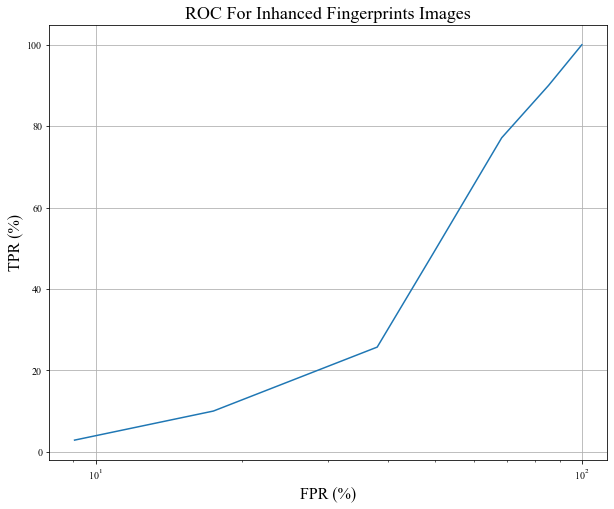

In [158]:
plt.figure(figsize=(10,8))
plt.semilogx(FPRate*100,TPRate*100)
plt.title('ROC For Inhanced Fingerprints Images', fontsize = 18)
plt.xlabel('FPR (%)', fontsize = 16)
plt.ylabel('TPR (%)', fontsize = 16)
plt.grid()
plt.show()

# <span style='font-family:"Times New Roman"'> <span styel=''>(f) Summary.

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this project, it is shown that binary image morphology processes are essential in characterizing shapes in images. Without them, detection of ridge edges and ridge bifurcation would be a difficult or not impossible task. The most important point about applying these processes would be the fact that there are no prewritten rules in selecting parameters. Most of the parameter selection process should be done with trial and error.

#### <span style='font-family:"Times New Roman"'> <span styel=''>    Results obtained for minutiae detection in fingerprints and fingerprint verification heavily rely on the quality of collected fingerprints. For instance, when there are plenty of discontinuity in finger prints ridges due to bad fingerprint quality, the number of detected minutiae will increase significantly even after the postprocessing (of course it would be possible to remove them but it is not possible to inspect every fingerprint available in dataset and remove those spurious edges) and consequently, the performance of fingerprint verification would decrease significantly. In contrast, when the quality of recorded fingerprints is good, the minutiae detection works fine and results in better verification.

#### <span style='font-family:"Times New Roman"'> <span styel=''>Beside the quality factor, the process of fingerprint verification is time consuming. For instance, for a small dataset we used in this project, although the written code was efficient enough, the time for calculating matching score was around 30 minutes for one fingerprint. Without doubt, methods based on state of an art literature in machine learning and artificial intelligence could perform significantly faster and may result in better accuracy.   
